# 1. Mushroom data split using Cramers' V
https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
df = pd.read_csv('../data/mushrooms.csv')
df
df['class'].value_counts()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


e    4208
p    3916
Name: class, dtype: int64

In [3]:
df.corr(method ='pearson')

""


In [4]:
from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder()
ohc.fit_transform(df).toarray()

array([[0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [5]:
import category_encoders as ce
ce_one_hot = ce.OneHotEncoder()
ce_one_hot.fit_transform(df)

,class_1,class_2,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-shape_6,cap-surface_1,cap-surface_2,...,population_4,population_5,population_6,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6,habitat_7
0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,1,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
8120,0,1,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
8121,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
8122,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [6]:
ce_one_hot.fit_transform(df).corr(method ='pearson')

,class_1,class_2,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-shape_6,cap-surface_1,cap-surface_2,...,population_4,population_5,population_6,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6,habitat_7
class_1,1.000000,-1.000000,-0.026886,-0.182567,-0.060664,0.018526,0.163565,0.023007,0.095454,0.088677,...,0.443722,-0.107055,-0.137645,0.112078,-0.165004,-0.138627,-0.126123,0.323346,-0.150087,0.155150
class_2,-1.000000,1.000000,0.026886,0.182567,0.060664,-0.018526,-0.163565,-0.023007,-0.095454,-0.088677,...,-0.443722,0.107055,0.137645,-0.112078,0.165004,0.138627,0.126123,-0.323346,0.150087,-0.155150
cap-shape_1,-0.026886,0.026886,1.000000,-0.219564,-0.056884,-0.720235,-0.304733,-0.020077,-0.040634,-0.019137,...,-0.060421,0.044626,-0.065496,0.002845,0.023197,-0.004529,0.071773,-0.029042,-0.036493,-0.096639
cap-shape_2,-0.182567,0.182567,-0.219564,1.000000,-0.015264,-0.193260,-0.081769,-0.005387,0.117712,-0.027947,...,-0.168381,-0.120154,0.024358,-0.052871,0.149151,0.374316,-0.182037,-0.095178,-0.037764,0.010113
cap-shape_3,-0.060664,0.060664,-0.056884,-0.015264,1.000000,-0.050070,-0.021185,-0.001396,-0.042607,-0.051272,...,0.000341,0.044603,-0.013143,0.288697,-0.037702,-0.012142,-0.050018,-0.025458,-0.009784,-0.021242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
habitat_3,-0.138627,0.138627,-0.004529,0.374316,-0.012142,-0.129312,-0.065047,-0.004286,0.077081,0.039697,...,-0.144434,-0.099772,-0.040355,-0.042059,-0.115762,1.000000,-0.153579,-0.078170,-0.030041,-0.065222
habitat_4,-0.126123,0.126123,0.071773,-0.182037,-0.050018,0.074986,-0.089230,-0.017653,-0.301670,0.110902,...,0.171068,0.277929,-0.120809,-0.173254,-0.476858,-0.153579,1.000000,-0.322005,-0.123748,-0.268668
habitat_5,0.323346,-0.323346,-0.029042,-0.095178,-0.025458,0.021891,0.090538,-0.008985,-0.039574,0.117915,...,0.169228,0.040714,-0.084610,-0.088184,-0.242715,-0.078170,-0.322005,1.000000,-0.062986,-0.136749
habitat_6,-0.150087,0.150087,-0.036493,-0.037764,-0.009784,-0.017450,0.119003,-0.003453,0.062109,0.031986,...,-0.154742,-0.080392,0.744425,-0.033889,-0.093276,-0.030041,-0.123748,-0.062986,1.000000,-0.052553


(array([  0.5,   4.5,   8.5,  12.5,  16.5,  20.5,  24.5,  28.5,  32.5,
         36.5,  40.5,  44.5,  48.5,  52.5,  56.5,  60.5,  64.5,  68.5,
         72.5,  76.5,  80.5,  84.5,  88.5,  92.5,  96.5, 100.5, 104.5,
        108.5, 112.5, 116.5]), <a list of 30 Text xticklabel objects>)

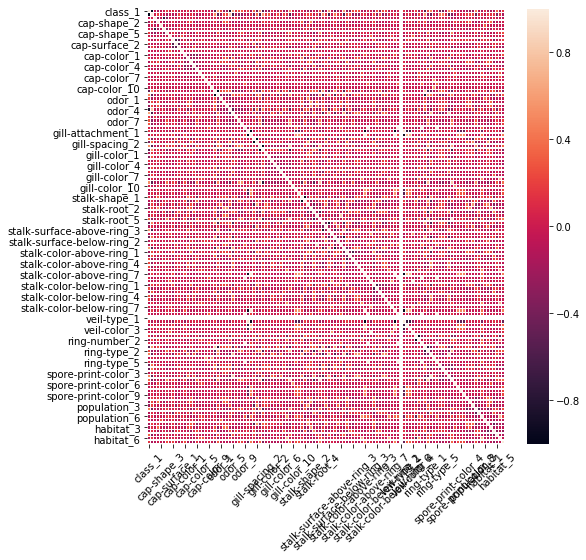

In [7]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data = ce_one_hot.fit_transform(df).corr(method ='pearson'), linewidths=.5, ax=ax)
plt.xticks(rotation=45)

In [8]:
from scipy.stats import chi2_contingency
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [9]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [10]:
len(df.columns)**2

529

In [11]:
import numpy as np
cr =[]
for i in range(len(df.columns)):
    for j in range(len(df.columns)):
        cr.append(cramers_v(df[df.columns[i]], df[df.columns[j]]))

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5]), <a list of 23 Text xticklabel objects>)

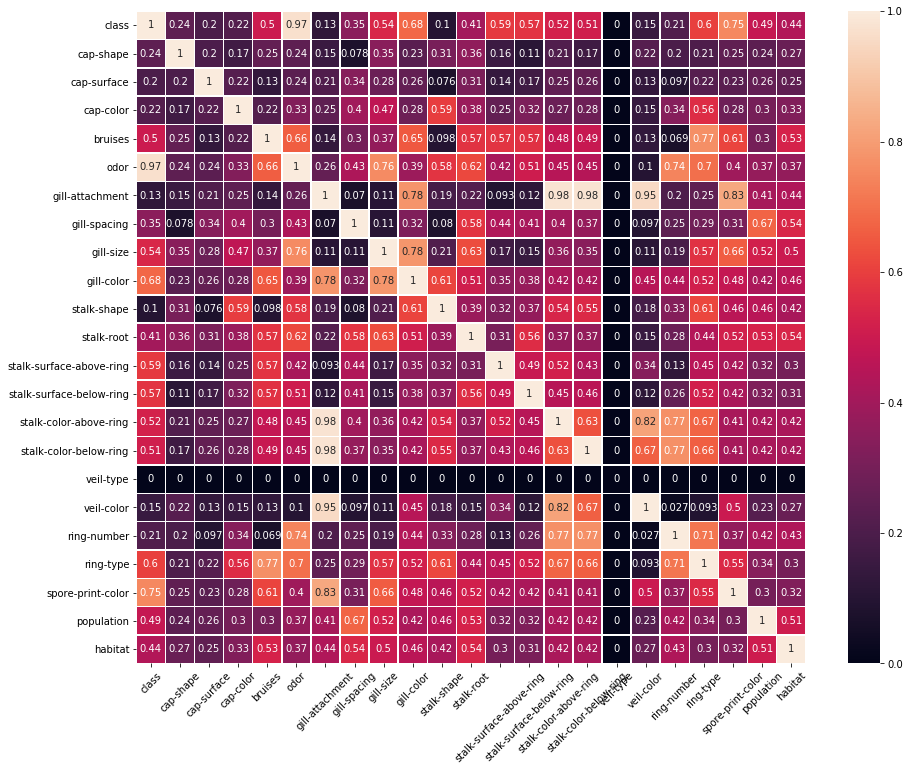

In [12]:
cramer_matrix = pd.DataFrame(np.array(cr).reshape(len(df.columns), len(df.columns)), 
                             index = df.columns,
                             columns = df.columns).fillna(0)
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(data = cramer_matrix, annot = True, linewidths=.5, ax=ax)
plt.xticks(rotation=45)

odor is highly associated with the class (edible/poisonous) of the mushroom, and that the gill-attachment feature is highly associated with three others.

# 2. Alone in the woods: Using Theil's U for survival
https://www.kaggle.com/shakedzy/alone-in-the-woods-using-theil-s-u-for-survival

Theil’s U, also referred to as the Uncertainty Coefficient, is based on the conditional entropy between x and y — or in human language, given the value of x, how many possible states does y have, and how often do they occur. Just like Cramer’s V, the output value is on the range of [0,1], with the same interpretations as before — but unlike Cramer’s V, it is asymmetric, meaning U(x,y)≠U(y,x) (while V(x,y)=V(y,x), where V is Cramer’s V). Using Theil’s U in the simple case above will let us find out that knowing y means we know x, but not vice-versa.

In [13]:
import math
import scipy.stats as ss
from collections import Counter

In [14]:
def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def theil_u(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

In [15]:
tu =[]
for i in range(len(df.columns)):
    for j in range(len(df.columns)):
        tu.append(theil_u(df[df.columns[i]], df[df.columns[j]]))

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5]), <a list of 23 Text xticklabel objects>)

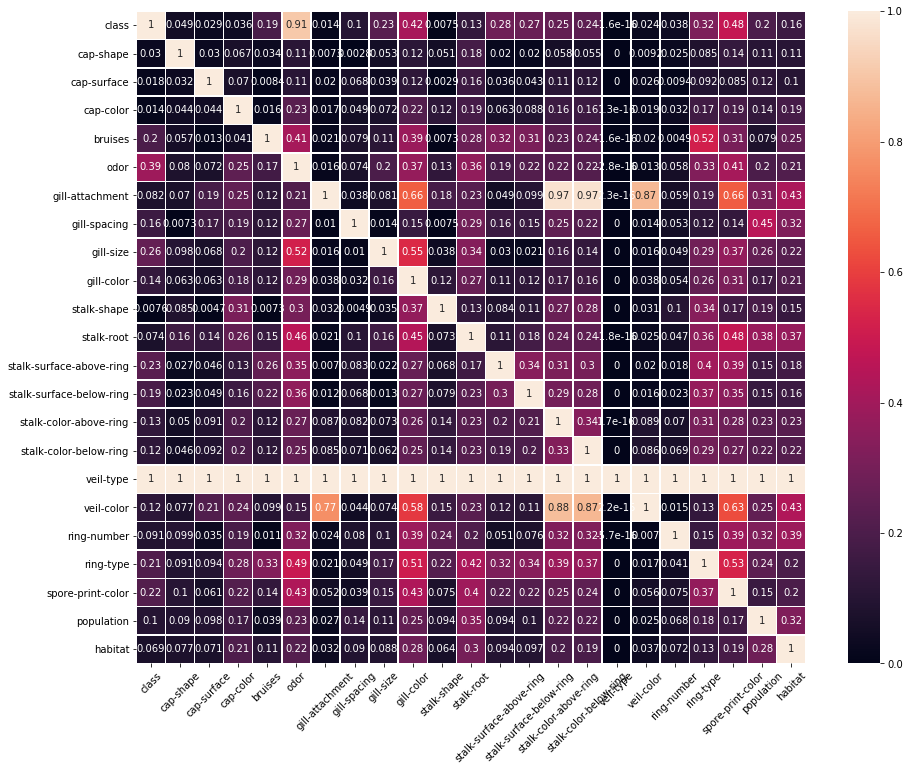

In [16]:
theils_u_matrix = pd.DataFrame(np.array(tu).reshape(len(df.columns), len(df.columns)), 
                             index = df.columns,
                             columns = df.columns).fillna(0)
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(data = theils_u_matrix, annot = True, linewidths=.5, ax=ax)
plt.xticks(rotation=45)

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [18]:
df.shape
df.isnull().values.any()

(8124, 23)

False

In [19]:
for feature in df.columns:
    uniq = np.unique(df[feature])
    print('{}: {} distinct values -  {}'.format(feature,len(uniq),uniq))

class: 2 distinct values -  ['e' 'p']
cap-shape: 6 distinct values -  ['b' 'c' 'f' 'k' 's' 'x']
cap-surface: 4 distinct values -  ['f' 'g' 's' 'y']
cap-color: 10 distinct values -  ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
bruises: 2 distinct values -  ['f' 't']
odor: 9 distinct values -  ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
gill-attachment: 2 distinct values -  ['a' 'f']
gill-spacing: 2 distinct values -  ['c' 'w']
gill-size: 2 distinct values -  ['b' 'n']
gill-color: 12 distinct values -  ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
stalk-shape: 2 distinct values -  ['e' 't']
stalk-root: 5 distinct values -  ['?' 'b' 'c' 'e' 'r']
stalk-surface-above-ring: 4 distinct values -  ['f' 'k' 's' 'y']
stalk-surface-below-ring: 4 distinct values -  ['f' 'k' 's' 'y']
stalk-color-above-ring: 9 distinct values -  ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
stalk-color-below-ring: 9 distinct values -  ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
veil-type: 1 distinct values -  ['p']
veil-color: 4 distin

In [20]:
# 고유값이 1개인 변수는 제거
df = df.drop(['veil-type'], axis=1)

In [21]:
# 중복 인스턴스 확인
print(f'Known mushrooms: {len(df.index)}\nUnique mushrooms: {len(df.drop_duplicates().index)}')

Known mushrooms: 8124
Unique mushrooms: 8124


In [22]:
# 동일 feature인데 target이 다른 인스턴스 확인
n = len(df.drop_duplicates(subset=df.drop(['class'],axis=1).columns).index)
print(f'Known mushrooms: {len(df.index)}\nMushrooms with same features: {n}')

Known mushrooms: 8124
Mushrooms with same features: 8124


In [23]:
theilu = pd.DataFrame(index=['class'],columns=df.columns)
columns = df.columns

def cat_corr (df):
    for j in range(0,len(columns)):
        u = theil_u(df['class'].tolist(),df[columns[j]].tolist())
        theilu.loc[:,columns[j]] = u
    theilu.fillna(value=np.nan,inplace=True)

    plt.figure(figsize=(20,1))
    sns.heatmap(theilu,annot=True,fmt='.2f')

    plt.show()

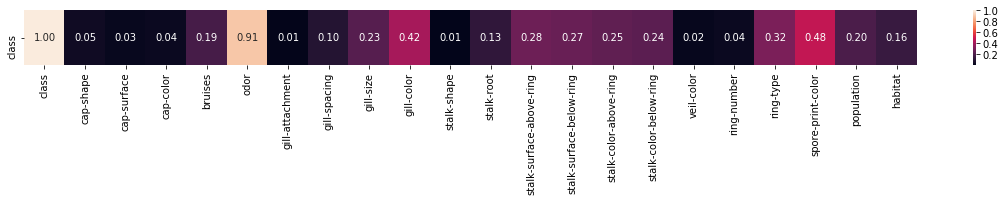

In [24]:
cat_corr(df)

## ordor(냄새)의 영향이 가장 크다

Text(-0.35000000000000003, 266.0, '256')

Text(0.6500000000000001, 10, '0')

Text(1.6500000000000001, 10, '0')

Text(2.6499999999999995, 130.0, '120')

Text(3.6499999999999995, 2170.0, '2160')

Text(4.6499999999999995, 202.0, '192')

Text(5.6499999999999995, 586.0, '576')

Text(6.6499999999999995, 586.0, '576')

Text(7.6499999999999995, 46.0, '36')

Text(0.049999999999999975, 10, '0')

Text(1.0499999999999998, 410.0, '400')

Text(2.05, 410.0, '400')

Text(3.05, 3418.0, '3408')

Text(4.05, 10, '0')

Text(5.05, 10, '0')

Text(6.05, 10, '0')

Text(7.05, 10, '0')

Text(8.049999999999999, 10, '0')

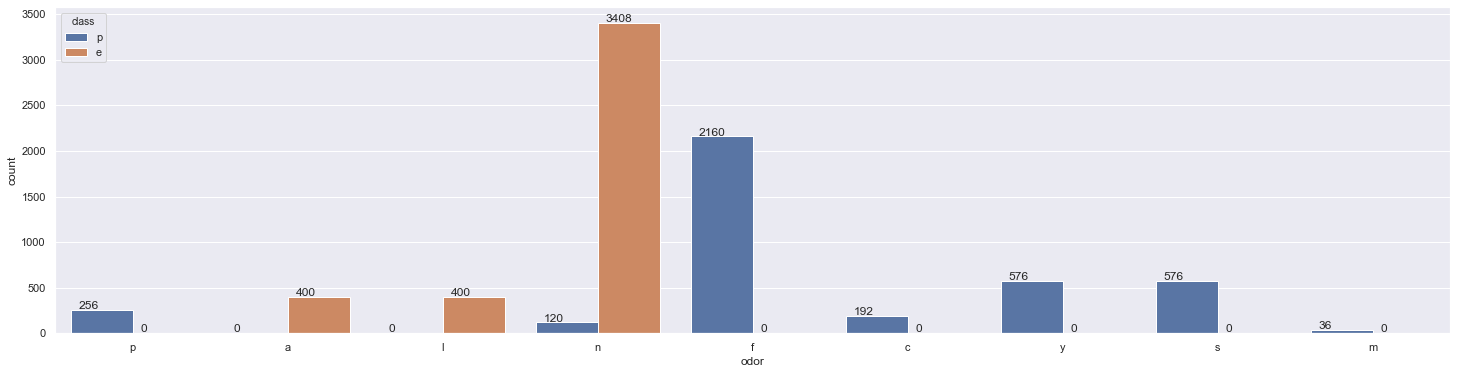

In [25]:
sns.set(rc={'figure.figsize':(25,6)})
ax=sns.countplot(x='odor',hue='class',data=df)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.show()

## 냄새만 맡아도 식용(e, edible)인지 아닌지(poison) 구분이(classification) 가능하다.
### 냄사가 안나는 with no odor (odor='n')인 경우는 어떤가 확인

<Figure size 1440x72 with 0 Axes>

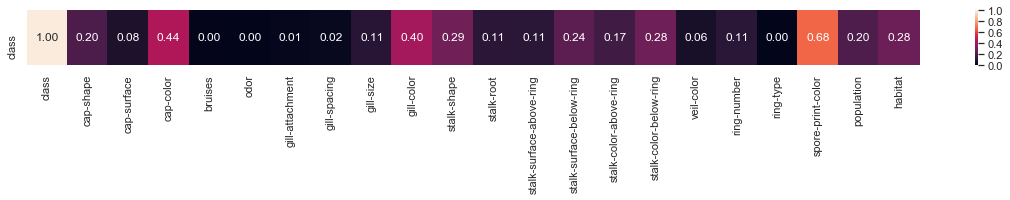

In [26]:
no_odor = df[df['odor'].isin(['n'])]

for j in range(0,len(columns)):
    u = theil_u(no_odor['class'].tolist(),no_odor[columns[j]].tolist())
    theilu.loc[:,columns[j]] = u
    
theilu.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,1))
sns.heatmap(theilu,annot=True,fmt='.2f')
plt.show()

Now the spore-print-color seems like a helpful feature:

Text(-0.35000000000000003, 1354.0, '1344')

Text(0.6500000000000001, 1306.0, '1296')

Text(1.6500000000000001, 586.0, '576')

Text(2.6499999999999995, 58.0, '48')

Text(3.6499999999999995, 10, '0')

Text(4.6499999999999995, 58.0, '48')

Text(5.6499999999999995, 58.0, '48')

Text(6.6499999999999995, 58.0, '48')

Text(0.049999999999999975, 10, '0')

Text(1.0499999999999998, 10, '0')

Text(2.05, 58.0, '48')

Text(3.05, 10, '0')

Text(4.05, 82.0, '72')

Text(5.05, 10, '0')

Text(6.05, 10, '0')

Text(7.05, 10, '0')

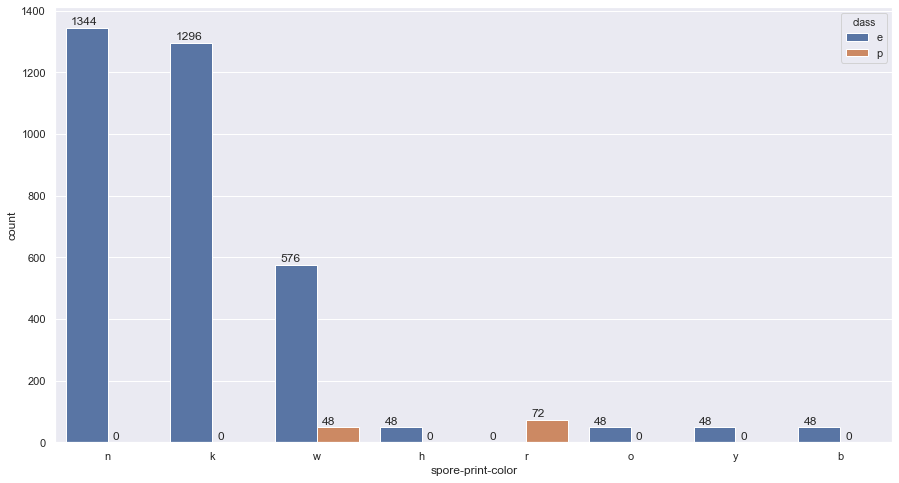

In [27]:
sns.set(rc={'figure.figsize':(15,8)})
ax=sns.countplot(x='spore-print-color',hue='class',data=no_odor)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.show()

In [28]:
no_odor_w = no_odor[no_odor['spore-print-color'].isin(['w'])]
(len(df.index) - len(no_odor_w.index)) / len(df.index)

0.9231905465288035

In [29]:
import sklearn.preprocessing as sp
factorized_nw = no_odor_w.copy()

for column in factorized_nw.columns.values:
    f, _ = pd.factorize(factorized_nw[column])
    factorized_nw.loc[:,column] = f

ohe = sp.OneHotEncoder()
X = factorized_nw.drop(['class'],axis=1)
y = factorized_nw['class'].tolist()
ohe.fit(X)
X = ohe.transform(X).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

for i in range(1,6):
    tree = DecisionTreeClassifier(max_depth=i, random_state=42)
    tree.fit(X_train,y_train)
    y_pred = tree.predict(X_test)
    print("Max depth: {} - accuracy:".format(i), accuracy_score(y_test, y_pred, normalize=True))

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

Max depth: 1 - accuracy: 0.967948717948718


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

Max depth: 2 - accuracy: 0.9871794871794872


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

Max depth: 3 - accuracy: 0.9935897435897436


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

Max depth: 4 - accuracy: 0.9935897435897436


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

Max depth: 5 - accuracy: 1.0


In [30]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       291
           1       1.00      1.00      1.00        21

    accuracy                           1.00       312
   macro avg       1.00      1.00      1.00       312
weighted avg       1.00      1.00      1.00       312

[[291   0]
 [  0  21]]


# End